In [1]:
import numpy as np, pandas as pd
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('olive.csv',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
1,0.127523,0.130412,0.128602,0.126175,0.127060,0.127010,0.126576,0.127732,0.126803,0.129111,...,0.127801,0.126769,0.126364,0.126932,0.127704,0.128081,0.127753,0.126702,0.130539,0.130991
2,0.127950,0.130675,0.128790,0.126733,0.127551,0.127513,0.127155,0.127919,0.127150,0.129285,...,0.128214,0.127435,0.127111,0.127368,0.128488,0.128827,0.127987,0.127098,0.130681,0.131317
3,0.129282,0.132017,0.130022,0.128244,0.128900,0.128898,0.128490,0.128973,0.128420,0.130611,...,0.129778,0.128874,0.128765,0.128951,0.130019,0.130062,0.129285,0.128209,0.131651,0.132794
4,0.131174,0.133824,0.132012,0.129893,0.130609,0.130888,0.130255,0.130899,0.130428,0.132354,...,0.131837,0.130952,0.130573,0.131019,0.132024,0.132067,0.131377,0.130053,0.133165,0.134692


0
4.0    25
2.0    17
1.0    10
3.0     8
Name: count, dtype: int64


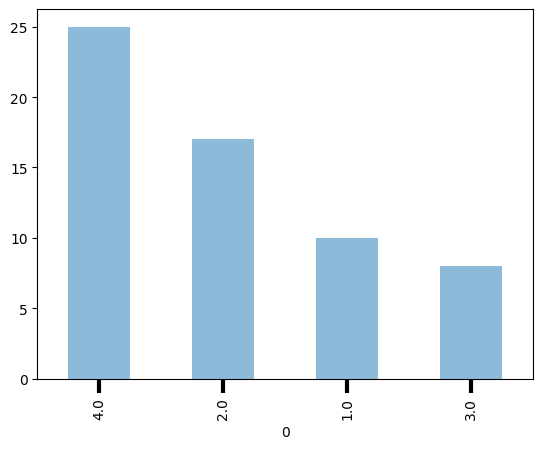

In [3]:

datatrans=np.transpose(data)
print(datatrans[0].value_counts())
datatrans[0].value_counts()[:].plot(kind='bar', alpha=0.5)
plt.tick_params(axis='x',  direction='out', length=10, width=3)
plt.show()

In [39]:

#data spliting
X=data.iloc[2:570,:].values
y = data.iloc[0:1,:].values
#data rotation
X=np.transpose(X)
y=np.transpose(y)

In [5]:

#standarizing
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
# print('results de scalling')
# print(X,y)


In [6]:
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rbf_layer (RBFLayer)        (None, 34)                19346     
                                                                 
 dense (Dense)               (None, 4)                 140       
                                                                 
 activation (Activation)     (None, 4)                 0         
                                                                 
Total params: 19486 (76.12 KB)
Trainable params: 19486 (76.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/1000


2/2 [==============================] - 0s 0s/step - loss: 0.2545 - accuracy: 0.3333
Epoch 2/1000
2/2 [==============================] - 0s 0s/step - loss: 0.2510 - accuracy: 0.2917
Epoch 3/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2484 - a

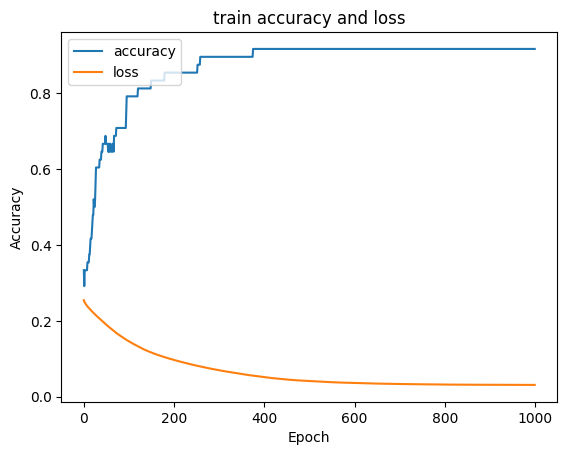

In [7]:

from rbfNetwork import RBFLayer, InitCentersKMeans

model = Sequential()
rbflayer = RBFLayer(10,
                        initializer=InitCentersKMeans(X_train),
                        betas=3.0,
                        input_shape=(568,))
model.add(rbflayer)
model.add(Dense(4))
model.add(Activation('linear'))
model.compile(loss='mean_squared_error',
                  optimizer=RMSprop(), metrics=['accuracy'])
print(model.summary())
history1 = model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose="auto")

import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['loss'])
plt.title('train accuracy and loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()
